Source of code from the data file used below is from the original authors stata code.

https://www.openicpsr.org/openicpsr/project/113484/version/V1/view?path=/openicpsr/113484/fcr:versions/V1/P2016_1118_data&type=folder

In [ ]:
import pandas as pd
import sklearn.model_selection as skm
import sklearn.linear_model as skl
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.regression.linear_model import OLS
from statsmodels.tools import add_constant
from statsmodels.formula.api import ols

file_path = '/Users/rebeccluo/Downloads/US_Paid_leave_analysis.dta'

# Load the file into a DataFrame
df = pd.read_stata(file_path)
# Load the Stata file into a DataFrame


# Display the first few rows of the DataFrame
column_names = df.columns.tolist()

# Print the column names


In [ ]:
birth_vars = [f'_IBirth_{i}' for i in range(2, 52)]  # Birth dummies from _IBirth_2 to _IBirth_51
birxpos_vars = [f'_IBirXpos_{i}_1' for i in range(2, 52)]  # Event-study dummies _IBirXpos_2_1 to _IBirXpos_50_1
llbirth_vars = [f'_LlBirth_{2}_1'] + [f'_LlBirth_{i}_1' for i in range(8, 51)]   # Reference period dummies from _LlBirth_8 to _LlBirth_50
llbipos_vars = [f'_LlBiXpos_{2}_1'] + [f'_LlBiXpos_{i}_1' for i in range(8, 51)]  # Include _LlBiXpos_2_1 and _LlBiXpos_8_1 to _LlBiXpos_50_1  # Event-study reference period _LlBiXpos_8_1 to _LlBiXpos_50_1

# Combine all variables into one list
all_vars = birth_vars + birxpos_vars + llbirth_vars + llbipos_vars

Pattern of LFP around birth for mothers giving birth in CA and NJ before and after paid leave mandates  


In [326]:
import pandas as pd
import statsmodels.formula.api as smf

# Load the actual data
df = pd.read_stata("US_Paid_leave_analysis.dta")
print("Data loaded successfully. Shape:", df.shape)

# Define states
state_ca = 'California'
state_nj = 'New Jersey'
df_filtered = df[(df['state'].isin([state_ca, state_nj]))]

# Define birth dummy variables
birth_vars = ' + '.join([f'_IBirth_{i}' for i in range(2, 52)])  # _IBirth_2 to _IBirth_51

formula = f'rm_lfp ~ {birth_vars}'

# Filter data for post_policy == 1 and states CA or NJ
df_post_policy = df[(df['post_policy'] == 1) & ((df['state'] == state_ca) | (df['state'] == state_nj))]
df_pre_policy = df[(df['post_policy'] == 0) & ((df['state'] == state_ca) | (df['state'] == state_nj))]

# Run regression for post_policy
model_post_policy_weighted = smf.wls(formula, data=df_post_policy, weights=df_post_policy['end_weight']).fit(cov_type='cluster', 
                                                                                                             cov_kwds={'groups': df_post_policy['sippid']})

# Print the summary of the weighted model
print("\
Post Policy Regression Results with Weights:")
print(model_post_policy_weighted.summary())


model_pre_policy_weighted = smf.wls(formula, data=df_pre_policy, weights=df_pre_policy['end_weight']).fit(cov_type='cluster', cov_kwds={'groups': df_pre_policy['sippid']})
# Print the summary of the weighted model
print("\
Pre Policy Regression Results with Weights:")
print(model_pre_policy_weighted.summary())

Data loaded successfully. Shape: (103624, 231)
Post Policy Regression Results with Weights:
                            WLS Regression Results                            
Dep. Variable:                 rm_lfp   R-squared:                       0.037
Model:                            WLS   Adj. R-squared:                  0.034
Method:                 Least Squares   F-statistic:                     2.581
Date:                Thu, 17 Oct 2024   Prob (F-statistic):           1.40e-07
Time:                        21:21:19   Log-Likelihood:                -11855.
No. Observations:               16427   AIC:                         2.381e+04
Df Residuals:                   16376   BIC:                         2.420e+04
Df Model:                          50                                         
Covariance Type:              cluster                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------

In [349]:
num_observations = df_filtered.shape[0]

print(f'Number of observations in California and New Jersey: {num_observations}')

Number of observations in California and New Jersey: 46299


In [327]:
# Extract coefficients and generate b_X for post-policy
b_X_post = pd.DataFrame(columns=['Index', 'Estimate'])
b_X_post = pd.concat([b_X_post, pd.DataFrame({'Index': [1], 'Estimate': [model_post_policy_weighted.params['Intercept']]})], ignore_index=True)

for i in range(2, 52):
    var_name = f'_IBirth_{i}'
    if var_name in model_post_policy_weighted.params.index:
        estimate = model_post_policy_weighted.params[var_name] + model_post_policy_weighted.params['Intercept']
        b_X_post = pd.concat([b_X_post, pd.DataFrame({'Index': [i], 'Estimate': [estimate]})], ignore_index=True)

# Extract coefficients and generate b_X for pre-policy
b_X_pre = pd.DataFrame(columns=['Index', 'Estimate'])
b_X_pre = pd.concat([b_X_pre, pd.DataFrame({'Index': [1], 'Estimate': [model_pre_policy_weighted.params['Intercept']]})], ignore_index=True)

for i in range(2, 52):
    var_name = f'_IBirth_{i}'
    if var_name in model_pre_policy_weighted.params.index:
        estimate = model_pre_policy_weighted.params[var_name] + model_pre_policy_weighted.params['Intercept']
        b_X_pre = pd.concat([b_X_pre, pd.DataFrame({'Index': [i], 'Estimate': [estimate]})], ignore_index=True)

# Print results for post-policy
print("\nExtracted b_X Post-Policy Coefficients:")
print(b_X_post)

# Print results for pre-policy
print("\nExtracted b_X Pre-Policy Coefficients:")
print(b_X_pre)



Extracted b_X Post-Policy Coefficients:
   Index  Estimate
0      1  0.762030
1      2  0.767205
2      3  0.765279
3      4  0.764215
4      5  0.759313
5      6  0.751712
6      7  0.734173
7      8  0.751334
8      9  0.739584
9     10  0.755541
10    11  0.765502
11    12  0.752072
12    13  0.776224
13    14  0.773887
14    15  0.763303
15    16  0.728120
16    17  0.706688
17    18  0.695242
18    19  0.680703
19    20  0.678122
20    21  0.655118
21    22  0.672351
22    23  0.664556
23    24  0.634873
24    25  0.611902
25    26  0.588740
26    27  0.559733
27    28  0.558597
28    29  0.571721
29    30  0.574404
30    31  0.577739
31    32  0.594875
32    33  0.579454
33    34  0.580857
34    35  0.576957
35    36  0.564107
36    37  0.569006
37    38  0.576413
38    39  0.575785
39    40  0.578632
40    41  0.553898
41    42  0.542682
42    43  0.542286
43    44  0.518729
44    45  0.547648
45    46  0.535207
46    47  0.557246
47    48  0.564429
48    49  0.550068
49    50 

/var/folders/nk/v5qz7_1x3hb9nxp2rz8sq6800000gn/T/ipykernel_54826/770262633.py:3: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  b_X_post = pd.concat([b_X_post, pd.DataFrame({'Index': [1], 'Estimate': [model_post_policy_weighted.params['Intercept']]})], ignore_index=True)
/var/folders/nk/v5qz7_1x3hb9nxp2rz8sq6800000gn/T/ipykernel_54826/770262633.py:13: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  b_X_pre = pd.concat([b_X_pre, pd.DataFrame({'Index': [1], 'Estimate': [model_pre_policy_weighted.para

In [328]:
months = np.arange(-24, 25)  # From -24 to 24 months
# Create an empty DataFrame to store results
results_df = pd.DataFrame({
    'Month': months
})

# Pre-Policy Estimates
pre_policy_estimates = np.zeros(len(months))  # Initialize with zeros
for i in range(1, 50):  # Assuming coefficients are from _IBirth_1 to _IBirth_51
    if i <= len(b_X_pre):  # Check if index is within bounds
        pre_policy_estimates[i-1] = b_X_pre.loc[b_X_pre['Index'] == i, 'Estimate'].values[0]

# Post-Policy Estimates 
post_policy_estimates = np.zeros(len(months))  # Initialize with zeros
for i in range(1, 50):  # Assuming coefficients are from _IBirth_1 to _IBirth_51
    if i <= len(b_X_post):  # Check if index is within bounds
        post_policy_estimates[i-1] = b_X_post.loc[b_X_post['Index'] == i, 'Estimate'].values[0]

# Assign the estimates to the DataFrame
results_df['Pre_Policy'] = pre_policy_estimates
results_df['Post_Policy'] = post_policy_estimates

# Calculate the difference
results_df['Difference'] = results_df['Post_Policy'] - results_df['Pre_Policy']

# Now, results_df should be correctly populated
print(results_df)  # Check the populated DataFrame


    Month  Pre_Policy  Post_Policy  Difference
0     -24    0.752684     0.762030    0.009347
1     -23    0.744617     0.767205    0.022588
2     -22    0.739222     0.765279    0.026057
3     -21    0.755130     0.764215    0.009085
4     -20    0.742425     0.759313    0.016888
5     -19    0.769297     0.751712   -0.017585
6     -18    0.757163     0.734173   -0.022990
7     -17    0.728746     0.751334    0.022589
8     -16    0.732106     0.739584    0.007478
9     -15    0.731445     0.755541    0.024096
10    -14    0.733887     0.765502    0.031615
11    -13    0.746165     0.752072    0.005907
12    -12    0.745729     0.776224    0.030495
13    -11    0.757395     0.773887    0.016493
14    -10    0.755552     0.763303    0.007751
15     -9    0.727211     0.728120    0.000910
16     -8    0.705665     0.706688    0.001023
17     -7    0.685353     0.695242    0.009889
18     -6    0.639360     0.680703    0.041342
19     -5    0.643410     0.678122    0.034712
20     -4    

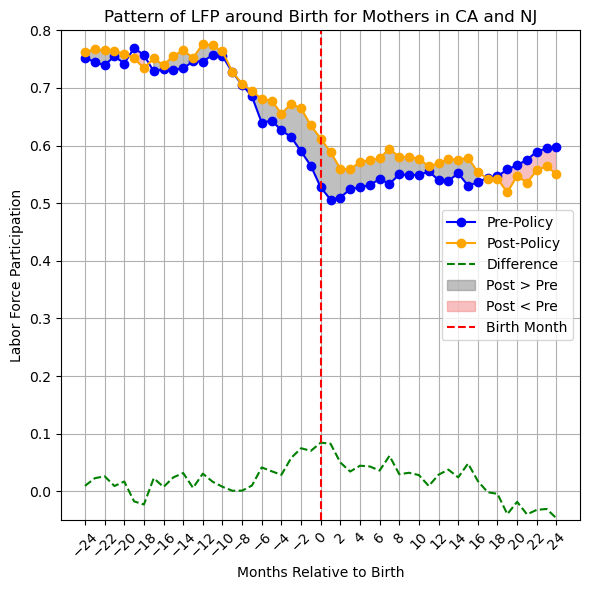

In [350]:
plt.figure(figsize=(6, 6))

# Plot Pre-Policy
plt.plot(results_df['Month'], results_df['Pre_Policy'], label='Pre-Policy', color='blue', marker='o')
# Plot Post-Policy
plt.plot(results_df['Month'], results_df['Post_Policy'], label='Post-Policy', color='orange', marker='o')
# Plot Difference
plt.plot(results_df['Month'], results_df['Difference'], label='Difference', color='green', linestyle='--')

# Adding labels and title
plt.fill_between(results_df['Month'], results_df['Pre_Policy'], results_df['Post_Policy'],
                 where=(results_df['Post_Policy'] > results_df['Pre_Policy']),
                 color='gray', alpha=0.5, label='Post > Pre')

# Add shaded area where Post < Pre
plt.fill_between(results_df['Month'], results_df['Pre_Policy'], results_df['Post_Policy'],
                 where=(results_df['Post_Policy'] < results_df['Pre_Policy']),
                 color='lightcoral', alpha=0.5, label='Post < Pre')

plt.axvline(0, color='red', linestyle='--', label='Birth Month')
plt.title('Pattern of LFP around Birth for Mothers in CA and NJ')
plt.xlabel('Months Relative to Birth')
plt.ylabel('Labor Force Participation')
plt.ylim(-0.05, 0.8)
plt.xticks(np.arange(-24, 25, 2),rotation=45)
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

Simple difference estimates (note that some combinations of years and relative-to-birth month do not exist (for example if a panel only included part of a year - these will be omitted)	  


In [330]:
formula = 'rm_lfp ~ C(lBirth) + C(post_policy) + ' + ' + '.join(llbipos_vars)
model = smf.wls(formula, data=df_filtered, weights=df_filtered['end_weight']).fit(cov_type='cluster', cov_kwds={'groups': df_filtered['sippid']})
print(model.summary())

                            WLS Regression Results                            
Dep. Variable:                 rm_lfp   R-squared:                       0.033
Model:                            WLS   Adj. R-squared:                  0.031
Method:                 Least Squares   F-statistic:                     3.190
Date:                Thu, 17 Oct 2024   Prob (F-statistic):           2.30e-19
Time:                        21:21:21   Log-Likelihood:                -34086.
No. Observations:               46299   AIC:                         6.835e+04
Df Residuals:                   46209   BIC:                         6.914e+04
Df Model:                          89                                         
Covariance Type:              cluster                                         
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 0.75